In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('data.csv')

# Understanding the specifications of dataset
Here we are going to understand the basics of trhe dataset like it's shape,information regarding the dataset , statistics of the dataset, and lastly are there any duplicates in the dataset

In [3]:
df.shape

(7691, 10)

In [4]:
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


## Information of the dataset

In [5]:
print('The information of the dataset is:\n ')
print(df.info())


The information of the dataset is:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB
None


Judging by looking at the information regarding dataset, there are no null values which saves us time to impute the dataset for null values

## Statistics of the dataset

In [6]:
print('The statistics of the dataset are \n ')
df.describe()

The statistics of the dataset are 
 


,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


This gives us the clear information regarding minimum , maximum , mean , standard deviation of the dataset.

In [7]:
print(f'The cities given in this dataset are \n {df['city'].unique()}')

The cities given in this dataset are 
 ['Mumbai' 'Pune' 'Nagpur' 'Bangalore' 'New Delhi']


In [8]:
print(f'The number of duplicates in the dataset are \n {df.duplicated().sum()}')

The number of duplicates in the dataset are 
 0


Clearly , there are no duplicates in the dataset

# EDA

Now,we will analyze the dataset with the visualizations

Text(0.5, 1.0, 'Count plot of furnishing column')

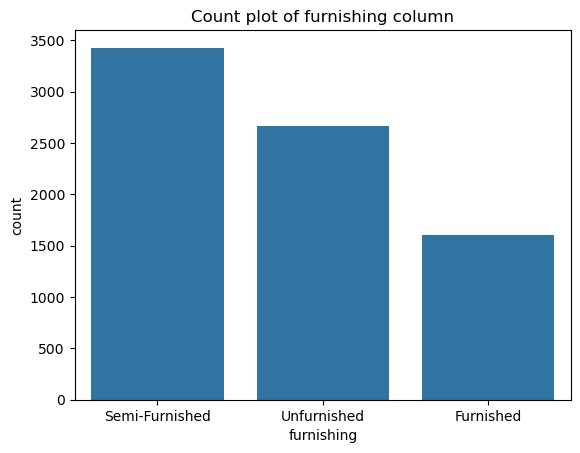

In [9]:
sns.countplot(x=df['furnishing'])
plt.title('Count plot of furnishing column')

The above visualization indicates that most of the tenants preferred **Semi-Furnished flats** and the least preferred is **Furnished or fully furnished flats**

Text(0.5, 1.0, 'Scatter plot of Area vs Rent')

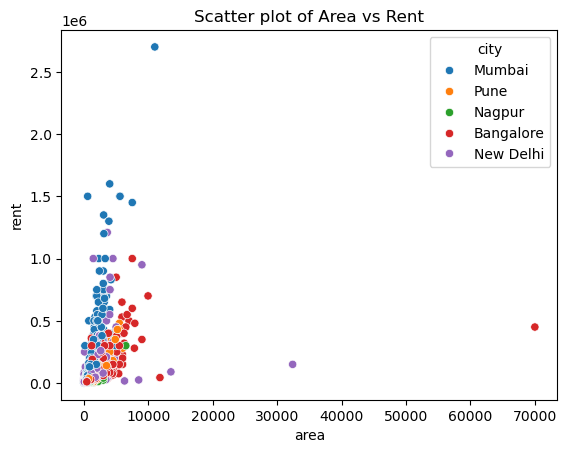

In [10]:
sns.scatterplot(x=df['area'],y=df['rent'],hue=df['city'])
plt.title('Scatter plot of Area vs Rent')

By analysing the scatterplot, we clearly see that the **most expensive flat** is in **Mumbai city**  and the **biggest flat** is in **Bangalore city**.

<Axes: xlabel='furnishing', ylabel='area_rate'>

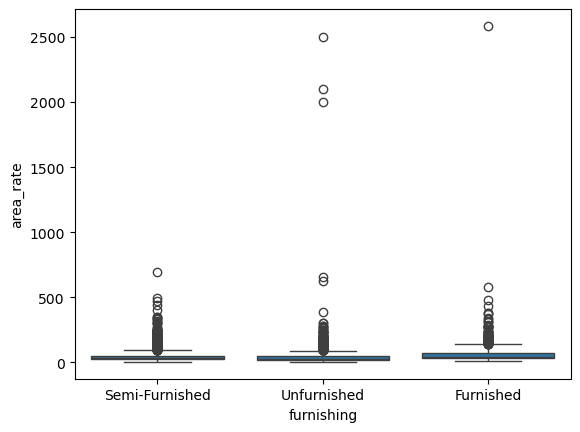

In [11]:
sns.boxplot(x=df['furnishing'],y=df['area_rate'])

Clearly,it is shown that the flats which are furnished are most expensive

Text(0.5, 1.0, 'Correlation matrix of the dataset')

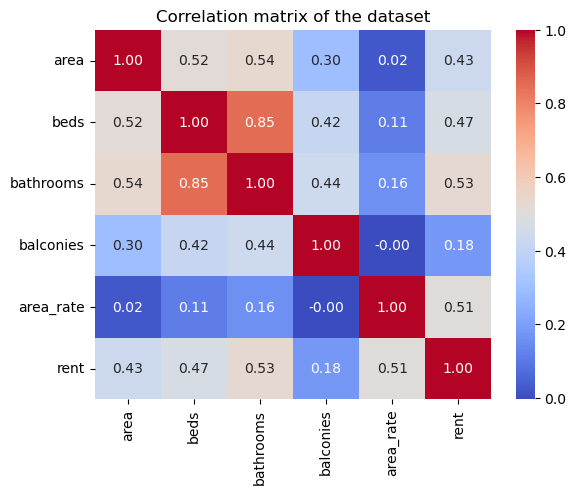

In [12]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True,fmt='1.2f')
plt.title('Correlation matrix of the dataset')

The correlation matrix above is indicating the correlation of different variable with each other. By observing the matrix, we conclude that the variables which arew hhaving highest correelation with the output **rent** are
1. **bathrooms** with correlation of 0.53
2. **area_rate** with correlation of 0.51
3. **beds** with correlation of 0.47
4. **area** with correlation of 0.43

# Feature Engineering

## Function transformation of the numeric columns

By doing function transformation,we cancel out the skewness of the numeric columns

In [13]:
func_num = FunctionTransformer(func=np.log1p)

In [14]:
df['rent'] = func_num.fit_transform(df['rent'])

## Creating a list for categorical columns

In [15]:
cat_cols = df.select_dtypes(include='object').columns

## Train Test split on the dataset

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(['rent'],axis=1),
                                               df['rent'],
                                               test_size=0.3,
                                               random_state=42
                                               )

## Creating a list for numerical columns

In [17]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

## Using Columntransformer and Pipeline
In this section I am going to use **ColumnTransformer** and I am going to apply **log transformation** and **StandardScaler** on **area_rate** and **area**.
After column transformation, I am going to create models , I have chosen regression models:
1. LinearRegression
2. DecisionTreeRegressor
3. RandomForestRegressor
4. GradientBoostingRegressor

Then finally I am going to create four **PipeLines**

In [18]:
preprocessing_num = ColumnTransformer(transformers=
                        [
                        ('ohe',OneHotEncoder(handle_unknown='ignore'),cat_cols),
                        ('scale',StandardScaler(),num_cols)
                        ])

In [19]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor(random_state=42,min_samples_split=10)

# Model Training

In [20]:
pipe1 = Pipeline(
    [
    ('num',preprocessing_num),
    ('model1',model1)
    ]
)
pipe1.fit(X_train,Y_train)

Pipeline(steps=[('num',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['house_type', 'locality', 'city', 'furnishing'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['area', 'beds', 'bathrooms', 'balconies', 'area_rate'], dtype='object'))])),
                ('model1', LinearRegression())])

In [21]:
pipe2 = Pipeline(
    [
    ('num',preprocessing_num),
    ('model2',model2)
    ]
)
pipe2.fit(X_train,Y_train)

Pipeline(steps=[('num',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['house_type', 'locality', 'city', 'furnishing'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['area', 'beds', 'bathrooms', 'balconies', 'area_rate'], dtype='object'))])),
                ('model2', DecisionTreeRegressor())])

In [22]:
pipe3 = Pipeline(
    [
    ('num',preprocessing_num),
    ('model3',model3)
    ]
)
pipe3.fit(X_train,Y_train)

Pipeline(steps=[('num',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['house_type', 'locality', 'city', 'furnishing'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['area', 'beds', 'bathrooms', 'balconies', 'area_rate'], dtype='object'))])),
                ('model3', RandomForestRegressor())])

In [23]:
pipe4 = Pipeline(
    [
    ('num',preprocessing_num),
    ('model4',model4)
    ]
)
pipe4.fit(X_train,Y_train)

Pipeline(steps=[('num',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['house_type', 'locality', 'city', 'furnishing'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['area', 'beds', 'bathrooms', 'balconies', 'area_rate'], dtype='object'))])),
                ('model4',
                 GradientBoostingRegressor(min_samples_split=10,
                                           random_state=42))])

# Predicting the output of the test dataset

In [24]:
Y_pred1 = pipe1.predict(X_test)
Y_pred2 = pipe2.predict(X_test)
Y_pred3 = pipe3.predict(X_test)
Y_pred4 = pipe4.predict(X_test)

# Model Evaluation Metrics
Before comparing our regression models, let's understand the key metrics used to assess performance:

**R2 Score** (Coefficient of Determination):
1. Measures how well predictions explain variance in actual values (0-1 range)
2. 1.0 = perfect prediction, 0.0 = predicts mean only, <0 = worse than mean
3. Higher is always better

**MAE (Mean Absolute Error)**:
1. Average absolute difference between predictions and actual values
2. Smaller values = better accuracy
3. Intuitive: "average prediction error in original units"

**RMSE (Root Mean Squared Error)**:
1. Penalizes large errors more heavily than MAE (squared errors)
2. Smaller values = better
3. Same units as target (easier interpretation for rent prediction)

**Cross-Validation (CV) Score**:
1. 10-fold CV R² average: Trains on 9/10 data folds, tests on 1/10, repeated 10x
2. Prevents overfitting by testing generalization across data splits
3. Most reliable metric for model selection


In [25]:
# Linear Regression results 
lr_r2 = r2_score(Y_test,Y_pred1)
lr_mae = mean_absolute_error(Y_test,Y_pred1)
lr_rmse = np.sqrt(mean_squared_error(Y_test,Y_pred1))
# Decision Tree Regressor results   
dtr_r2 = r2_score(Y_test, Y_pred2)
dtr_mae = mean_absolute_error(Y_test, Y_pred2)
dtr_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred2))

# Random Forest Regressor results 
rf_r2 = r2_score(Y_test,Y_pred3)
rf_mae = mean_absolute_error(Y_test,Y_pred3)
rf_rmse = np.sqrt(mean_squared_error(Y_test,Y_pred3))

# Gradient Boost Regressor results

gbr_r2 = r2_score(Y_test,Y_pred4)
gbr_mae = mean_absolute_error(Y_test,Y_pred4)
gbr_rmse = np.sqrt(mean_squared_error(Y_test,Y_pred4))
# Cross Validation scores
cv1 = cross_val_score(pipe1,X_train,Y_train,cv=10,scoring='r2').mean()
cv2 = cross_val_score(pipe2,X_train,Y_train,cv=10,scoring='r2').mean()
cv3 = cross_val_score(pipe3,X_train,Y_train,cv=10,scoring='r2').mean()
cv4 = cross_val_score(pipe4,X_train,Y_train,cv=10,scoring='r2').mean()
# Comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
    'R² Score': [lr_r2,dtr_r2,rf_r2,gbr_r2],
    'MAE': [lr_mae,dtr_mae,rf_mae,gbr_mae],
    'RMSE': [lr_rmse,dtr_rmse,rf_rmse,gbr_rmse],
    'CV' :  [cv1,cv2,cv3,cv4]
})
print('The results of the models are \n')
print(results)

The results of the models are 

               Model  R² Score       MAE      RMSE        CV
0  Linear Regression  0.720555  0.309502  0.518298  0.682653
1      Decision Tree  0.985231  0.043257  0.119153  0.982596
2      Random Forest  0.988957  0.027417  0.103033  0.990911
3     Gradient Boost  0.990408  0.052502  0.096026  0.989464


# Result of every model:

After analyzing the results given above we conclude that:
1. GradientBoostingRegressor: It comes out as top performer with results of:
   - Highest R2 score of 0.990408 (99.04%) which indicates great accuracy
   - Lowest RMSE error of 0.096026 (9.6%)
   - A good cross validation score (CV score) of 0.989464 (98.94%)
2. RandomForestRegressor: It has second best score after Gradient Boosting:
   - Swecond highest R2 score of 0.988957 (98.89%) 
   - RMSE error of 0.10333 (10.33%)
   - Highest cross validation score (CV score) of 0.990911 (99.09%)
3. DecisionTreeRegressor: It also gives a competitive result:
   - R2 score of 0.985231 (98.52%) just slightly lower than Random Forest 
   - RMSE error of 0.119153 (11.91%)
   - A good cross validation score (CV score) of 0.982596 (98.26%)
4. LinearRegression : It has a lowest results as compared to other three models.

So, after analyzing the result I came to conclusion that Gradient Boosting gives best result due to high R2 score, Lowest RMSE error and a good CV score


# Exporting the pipeline

In [39]:
import pickle
pickle.dump(pipe4, open('pipe4.pkl', 'wb'))